## OpenCV Continue Working with Images
The code snippet below demonstrates how to load a color image using OpenCV. Then the black_and_white() function will manually convert each pixel to black and white. 



In [1]:
import cv2
import numpy as np
import requests

# Getting the image from the internet
'''IMAGE_URL = "https://codehs.com/uploads/e07cd01271cac589cc9ef1bf012c6a0c"
IMAGE_WIDTH = 280
IMAGE_HEIGHT = 200

# Load the image from URL
response = requests.get(IMAGE_URL)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)'''

#load the image locally - use any image file downloaded from the internet or a picture that you have saved on your computer

IMAGE_WIDTH = 500
IMAGE_HEIGHT = 500

apple = cv2.imread("apple.jpg")
kiwi = cv2.imread("kiwi.jpg")

# Resize the image
image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))

# Function to apply a black and white filter pixel by pixel
def black_and_white(image):
    height, width, _ = image.shape
    for x in range(width):
        for y in range(height):
            pixel = image[y, x]  # OpenCV uses (row, col) = (y, x)
            avg = (int(pixel[0]) + int(pixel[1]) + int(pixel[2])) // 3
            image[y, x] = (avg, avg, avg)  # Set R, G, and B to avg
    return image

# Convert image to grayscale manually
print("Making Grayscale.... Look for an image in a separate window")
print("It might take a minute.... Look for an image in a separate window")
gray_image = black_and_white(image.copy())

# Display images
cv2.imshow("Original Image", image)
cv2.imshow("Grayscale Image", gray_image)

# Wait for a key press and close windows
print("Press any key to close the image windows.")
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'image' is not defined

## Plotting image in the Jupyter Notebook using MatplotLib
The code snippet below demonstrates how to show image directly in the notebook using MatPlotLib plot commands.  Change the code above to use this code display images in the notebook instead of in a separate window.

It also demonstrates the use of os library to handle directory / file names more robustly.


In [1]:
import numpy as np
import cv2
import os
import math
from matplotlib import pyplot as plt

print("DONE")

DONE


In [2]:
# This will display a single image (numpy arrays) using MatPlotLib
def displayImage(image):
    cleanImg_1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(cleanImg_1)
    plt.title('Picture 1')
    plt.axis('off')
    plt.show()


# This will display list of images (numpy arrays) using MatPlotLib
def displayImages(images):
    numImages = len(images)
    
    # Create a figure and two subplots
    fig, axs = plt.subplots(numImages, 1, figsize=(15, 8))
    #fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    for lp in range(numImages):
        cleanImg = cv2.cvtColor(images[lp], cv2.COLOR_BGR2RGB)
        
        axs[lp].imshow(cleanImg)
        axs[lp].set_title('Image ' + str(lp + 1))
        axs[lp].axis('off')  # Hide axes
        
    # Show the images
    plt.tight_layout()
    plt.show()
    

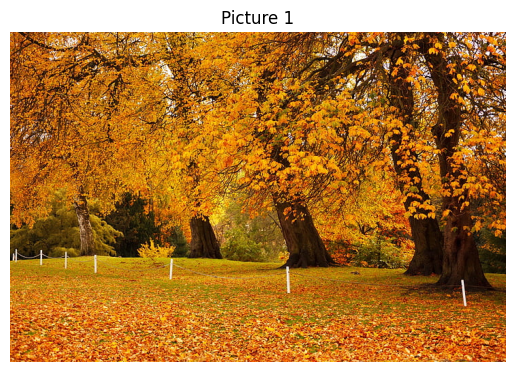

In [3]:
inputDirectory = "Images"

inputFile_1 = inputDirectory + os.sep + "Fall.jpg"
img_1 = cv2.imread(inputFile_1)

displayImage(img_1)

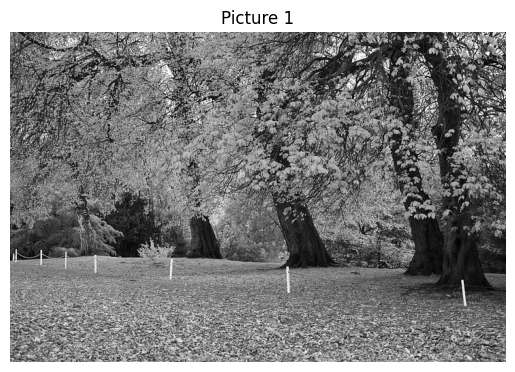

In [5]:
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
displayImage(img_1)

## Create an "Average" of 2 images
Write the function <b>average_images(image1, image2)</b> that takes 2 images and combines them by creating an "average" of the two pixels, where both of the images are displayed in the same bitmap grid.  
Use the code above to convert both images to single-channel grayscale, display each of the images separately and then the combined image inline using matplotlib.

C:\Users\200516665\AppData\Local\Temp\ipykernel_19508\1899333334.py:42: RuntimeWarning: overflow encountered in scalar add
  image1[y, x] = ((pixel1[0] + pixel2[0]) // 2, (pixel1[1] + pixel2[1]) // 2, (pixel1[2] + pixel2[2]) // 2)  # Set R, G, and B to avg


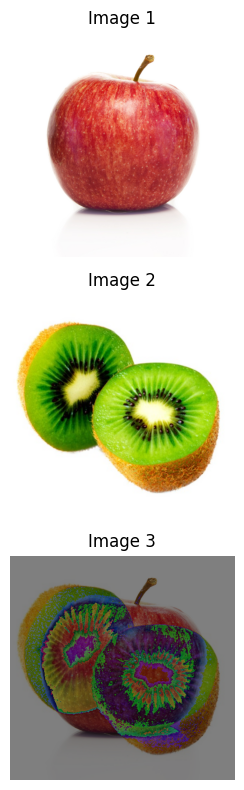

In [27]:
# SABRINA DINI AI P5

import cv2
import numpy as np
import requests

IMAGE_WIDTH = 500
IMAGE_HEIGHT = 500

apple = cv2.imread("apple.jpg")
apple1 = cv2.imread("apple.jpg")
kiwi = cv2.imread("kiwi.jpg")

def displayImages(images):
    numImages = len(images)
    
    # Create a figure and two subplots
    fig, axs = plt.subplots(numImages, 1, figsize=(15, 8))
    #fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    for lp in range(numImages):
        cleanImg = cv2.cvtColor(images[lp], cv2.COLOR_BGR2RGB)
        
        axs[lp].imshow(cleanImg)
        axs[lp].set_title('Image ' + str(lp + 1))
        axs[lp].axis('off')  # Hide axes
        
    # Show the images
    plt.tight_layout()
    plt.show()

apple = cv2.resize(apple, (IMAGE_WIDTH, IMAGE_HEIGHT))
kiwi = cv2.resize(kiwi, (IMAGE_WIDTH, IMAGE_HEIGHT))

# Function to apply a black and white filter pixel by pixel
def combine(image1, image2):
    height, width, _ = image1.shape
    for x in range(width):
        for y in range(height):
            pixel1 = image1[y, x]  # OpenCV uses (row, col) = (y, x)
            pixel2 = image2[y, x]
            image1[y, x] = ((pixel1[0] + pixel2[0]) // 2, (pixel1[1] + pixel2[1]) // 2, (pixel1[2] + pixel2[2]) // 2)  # Set R, G, and B to avg
    return image1

displayImages([apple1, kiwi, combine(apple, kiwi)])



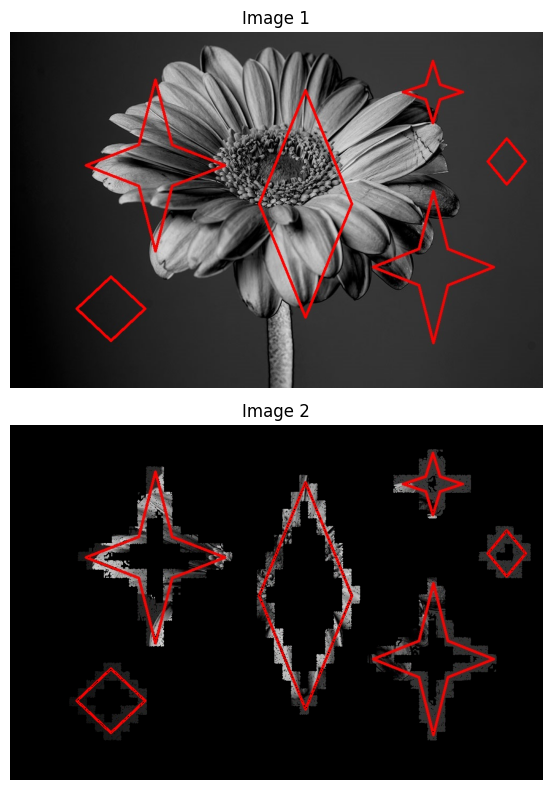

In [39]:
bw_image1 = cv2.imread("BW.jpg")
bw_image = cv2.imread("BW.jpg")

def mask(image):
    height, width, _ = image.shape
    for x in range(width):
        for y in range(height):
            pixel = image[y, x]  # OpenCV uses (row, col) = (y, x)
            if ((pixel[0] == pixel[1]) and (pixel[1] == pixel[2])):
                pixel[0] = 0 
                pixel[1] = 0
                pixel[2] = 0          

            # Set R, G, and B to avg
    return image

def mask(image):
    height, width, _ = image.shape
    for x in range(width):
        for y in range(height):
            pixel = image[y, x]  # OpenCV uses (row, col) = (y, x)

            if (pixel[2] >= 254):
                pixel[0] = 0 
                pixel[1] = 0
                pixel[2] = 0             

            # Set R, G, and B to avg
    return image

displayImages([bw_image1, mask(bw_image)])